In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
Brooklyn = pd.DataFrame(cs[cs['borough'] == 'Brooklyn']['LocationID'])
Manhattan  = pd.DataFrame(cs[cs['borough'] == 'Manhattan']['LocationID'])
Queens  = pd.DataFrame(cs[cs['borough'] == 'Queens']['LocationID'])

In [0]:
#combined_zones
Manhattan_Queens = pd.concat([Manhattan,Queens], ignore_index= True)
Manhattan_Brooklyn = pd.concat([Manhattan,Brooklyn], ignore_index= True)
Manhattan_Queens_Brooklyn = pd.concat([Manhattan,Brooklyn,Queens], ignore_index = True)
Brooklyn_Queens = pd.concat([Queens,Brooklyn],ignore_index= True)

In [0]:
# demand in each combined zones
def transfer(name):
  a = [7,8]
  data_07 = pd.read_csv('/content/drive/capstone dataset/cleaned_2018_06.csv')
  values_07 = pd.DataFrame(data_07['PULocationID'].value_counts())
  values_07.reset_index(drop=False, inplace=True)
  new = pd.merge(name,values_07, how='left', right_on='index', left_on='LocationID')
  for i in a:
    data_07 = pd.read_csv(f'/content/drive/capstone dataset/cleaned_2018_0{i}.csv')
    values_07 = pd.DataFrame(data_07['PULocationID'].value_counts())
    values_07.reset_index(drop=False, inplace=True)
    result = pd.merge(name,values_07, how='left', right_on='index', left_on='LocationID')
    final = pd.concat([new,result],ignore_index=True)
  final.dropna(inplace = True)
  exam = pd.DataFrame(final.groupby('LocationID')['PULocationID'].sum())
  exam.reset_index(drop=False, inplace = True)
  exam.rename(columns = {'PULocationID':'Counts'}, inplace=True)
  return exam

In [0]:
data = transfer(Manhattan_Queens_Brooklyn)
data1 = transfer(Manhattan_Queens)
data2 = transfer(Manhattan_Brooklyn)
data3 = transfer(Brooklyn_Queens)
data4 = transfer(Manhattan)

In [0]:
data1.to_csv('/content/drive/capstone dataset/Manhattan_Queens.csv')
data2.to_csv('/content/drive/capstone dataset/Manhattan_Brooklyn.csv')
data3.to_csv('/content/drive/capstone dataset/Brooklyn_Queens.csv')
data4.to_csv('/content/drive/capstone dataset/Manhattan.csv')

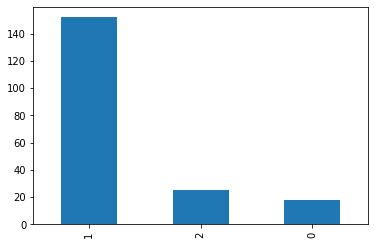

In [319]:
#try k-means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
data['label']=kmeans.labels_
data['label'].value_counts().plot(kind='bar')

In [347]:
#get the range and size of each cluster
cluster_distribution = data['label'].value_counts()
a = [0,1,2]
for j in a:
  min_num = data[data['label'] == j]['Counts'].min()
  max_num = data[data['label'] == j]['Counts'].max()
  print(f'Size of cluster is {cluster_distribution[j]}, cluster {j} is from {min_num} to {max_num}')


Size of cluster is 18, cluster 0 is from 300990.0 to 479555.0
Size of cluster is 152, cluster 1 is from 3.0 to 91401.0
Size of cluster is 25, cluster 2 is from 109030.0 to 269413.0


In [345]:

cluster_distribution[1]
cluster_distribution

152